#Problem 5

In [ ]:
#download the model
!git clone https://github.com/xavysp/DexiNed.git
%cd DexiNed

Cloning into 'DexiNed'...
remote: Enumerating objects: 1051, done.
remote: Counting objects: 100% (147/147), done.
remote: Compressing objects: 100% (98/98), done.
remote: Total 1051 (delta 87), reused 101 (delta 45), pack-reused 904
Receiving objects: 100% (1051/1051), 158.92 MiB | 5.60 MiB/s, done.
Resolving deltas: 100% (517/517), done.
/content/DexiNed


In [ ]:
#check for graphics card
!nvidia-smi

Fri Dec 10 07:58:25 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   52C    P8    30W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pip install kornia

     |████████████████████████████████| 401 kB 13.1 MB/s 


In [ ]:
#downloading the pretrained weights
!gdown --id 1V56vGTsu7GYiQouCIKvTWl5UKCZ6yCNu

Downloading...
From: https://drive.google.com/uc?id=1V56vGTsu7GYiQouCIKvTWl5UKCZ6yCNu
To: /content/DexiNed/10_model.pth
100% 141M/141M [00:01<00:00, 82.0MB/s]


In [ ]:
%mkdir -p checkpoints/BIPED/10
%mv 10_model.pth checkpoints/BIPED/10/

##CIFAR-100

In [ ]:
!pip install cifar2png

  Created wheel for cifar2png: filename=cifar2png-0.0.4-py3-none-any.whl size=5928 sha256=b35eca08b8b2a7f6989388dfd546ef573c5e784cb327141cb3b87630b87cec36
  Stored in directory: /root/.cache/pip/wheels/f5/8f/07/c1d632c47b80ecbed8f6866edfa21fd9ca21c72f9ccb8216e9
Successfully built cifar2png


In [ ]:
!cifar2png cifar100 CIFAR-100-images/

cifar-100-python.tar.gz does not exists.
165kKB [00:04, 35.7kKB/s]              
Saving train images: 100% 50000/50000 [00:22<00:00, 2270.61it/s]
Saving test images: 100% 10000/10000 [00:04<00:00, 2295.32it/s]


In [ ]:
%rm -rf CIFAR-100-edges/

In [ ]:
%rm -rf DexiNed/data/*

In [ ]:
%rm -rf /content/DexiNed/result/

Running edge detection on test dataset and storing the results

In [ ]:
%%shell
cd /content/DexiNed/
# data_dir = "/content/CIFAR-100-images"
for dir in /content/CIFAR-100-images/test/*/    # list directories in the form "/tmp/dirname/"
do
    dir=${dir%*/}      # remove the trailing "/"
    mkdir -p "/content/CIFAR-100-edges/test/${dir##*/}"

    rm -rf /content/DexiNed/data/*
    rm -rf /content/DexiNed/result/

    cp -v `ls -d /content/CIFAR-100-images/test/${dir##*/}/* | head -10` /content/DexiNed/data

    python /content/DexiNed/main.py --choose_test_data=-1

    mv -v /content/DexiNed/result/BIPED2CLASSIC/fused/* /content/CIFAR-100-edges/test/${dir##*/}/
    
    echo "${dir##*/}"    # print everything after the final "/"
done

cd /content/

Streaming output truncated to the last 5000 lines.
'/content/CIFAR-100-images/test/bottle/0006.png' -> '/content/DexiNed/data/0006.png'
'/content/CIFAR-100-images/test/bottle/0007.png' -> '/content/DexiNed/data/0007.png'
'/content/CIFAR-100-images/test/bottle/0008.png' -> '/content/DexiNed/data/0008.png'
'/content/CIFAR-100-images/test/bottle/0009.png' -> '/content/DexiNed/data/0009.png'
'/content/CIFAR-100-images/test/bottle/0010.png' -> '/content/DexiNed/data/0010.png'
Number of GPU's available: 1
Pytorch version: 1.10.0+cu111
mean_bgr: [103.939, 116.779, 123.68]
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if n

running edge detection on train dataset and storing results

In [ ]:
%%shell
cd /content/DexiNed/
# data_dir = "/content/CIFAR-100-images"
for dir in /content/CIFAR-100-images/train/*/    # list directories in the form "/tmp/dirname/"
do
    dir=${dir%*/}      # remove the trailing "/"
    mkdir -p "/content/CIFAR-100-edges/train/${dir##*/}"

    rm -rf /content/DexiNed/data/*
    rm -rf /content/DexiNed/result/

    cp -v `ls -d /content/CIFAR-100-images/train/${dir##*/}/* | head -40` /content/DexiNed/data

    python /content/DexiNed/main.py --choose_test_data=-1

    mv -v /content/DexiNed/result/BIPED2CLASSIC/fused/* /content/CIFAR-100-edges/train/${dir##*/}/
    
    echo "${dir##*/}"    # print everything after the final "/"
done

cd /content/

'/content/CIFAR-100-images/train/apple/0001.png' -> '/content/DexiNed/data/0001.png'
'/content/CIFAR-100-images/train/apple/0002.png' -> '/content/DexiNed/data/0002.png'
'/content/CIFAR-100-images/train/apple/0003.png' -> '/content/DexiNed/data/0003.png'
'/content/CIFAR-100-images/train/apple/0004.png' -> '/content/DexiNed/data/0004.png'
'/content/CIFAR-100-images/train/apple/0005.png' -> '/content/DexiNed/data/0005.png'
'/content/CIFAR-100-images/train/apple/0006.png' -> '/content/DexiNed/data/0006.png'
'/content/CIFAR-100-images/train/apple/0007.png' -> '/content/DexiNed/data/0007.png'
'/content/CIFAR-100-images/train/apple/0008.png' -> '/content/DexiNed/data/0008.png'
'/content/CIFAR-100-images/train/apple/0009.png' -> '/content/DexiNed/data/0009.png'
'/content/CIFAR-100-images/train/apple/0010.png' -> '/content/DexiNed/data/0010.png'
'/content/CIFAR-100-images/train/apple/0011.png' -> '/content/DexiNed/data/0011.png'
'/content/CIFAR-100-images/train/apple/0012.png' -> '/content/Dex

CalledProcessError: ignored

#Edges and Edge-enhanced Images

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
from natsort import natsorted as nsort
%matplotlib inline

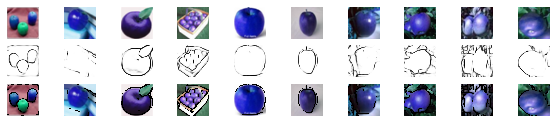

In [ ]:
#combined exapmle
images_path = nsort([image for image in os.listdir(os.path.join('CIFAR-100-edges','test','apple')) if image.startswith('0')])
input_path = nsort([image for image in os.listdir(os.path.join('CIFAR-100-images','test','apple')) if image.startswith('0')])


fig = plt.figure(figsize=(10,2))

# setting values to rows and column variables
rows = 3
columns = 10

for i in range(columns):
  fig.add_subplot(rows, columns, i+1)
  image = cv2.imread(os.path.join(os.path.join('CIFAR-100-images','test','apple',input_path[i])))
  plt.imshow(image)
  plt.axis('off')
  
#edges
for i in range(columns, 2*columns):
  fig.add_subplot(rows, columns, i+1)
  image = cv2.imread(os.path.join(os.path.join('CIFAR-100-edges','test','apple',images_path[i-columns])))
  plt.imshow(image)
  plt.axis('off')

# edge enhanced images
for i in range(2*columns, 3*columns):
  fig.add_subplot(rows, columns, i+1)
  original = cv2.imread(os.path.join(os.path.join('CIFAR-100-images','test','apple',input_path[i-2*columns])))
  edges = cv2.imread(os.path.join(os.path.join('CIFAR-100-edges','test','apple',images_path[i-2*columns])))
  img2 = original.copy()
  img2[edges[:,:,0] <= 200] = [0, 0, 0]  
  plt.imshow(img2)
  plt.axis('off')

##Individual Exapmles

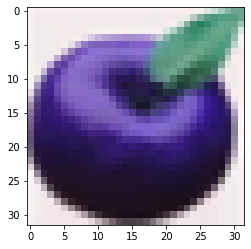

In [ ]:
#Original image
img = cv2.imread(os.path.join(os.path.join('CIFAR-100-images','test','apple',input_path[2])))  # creat RGB image from grayscale
plt.imshow(img)


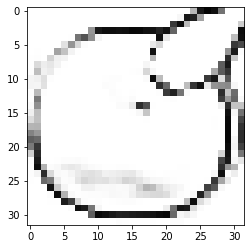

In [ ]:
#detected edge
edges = cv2.imread(os.path.join(os.path.join('CIFAR-100-edges','test','apple',images_path[2])))
plt.imshow(edges)

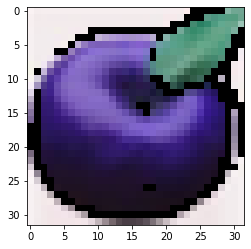

In [ ]:
#Edge-enhanced image
img2 = img.copy()
img2[edges[:,:,0] <= 200] = [0, 0, 0]  
plt.imshow(img2)

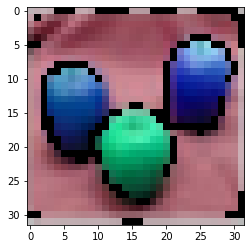

In [ ]:
#another example
img = cv2.imread(os.path.join(os.path.join('CIFAR-100-images','test','apple',input_path[0])))
edges = cv2.imread(os.path.join(os.path.join('CIFAR-100-edges','test','apple',images_path[0])))
img2 = img.copy()
img2[edges[:,:,0] <= 200] = [0, 0, 0]  
plt.imshow(img2)

##Saving edge enhanced images for further problems

In [ ]:
%rm -rf CIFAR-100-enhanced/

In [ ]:
%mkdir -p /content/CIFAR-100-enhanced/train/

data_dir1 = '/content/CIFAR-100-images/'
data_dir2 = '/content/CIFAR-100-edges/'

#print(os.listdir(data_dir))
classes = os.listdir(data_dir1 + "/train")
print(classes)

['dog', 'bird', 'frog', 'airplane', 'horse', 'ship', 'automobile', 'truck', 'cat', 'deer']


In [ ]:
for x in classes:
  path = os.path.join('CIFAR-100-enhanced', 'train', x)
  os.mkdir(path)

  images_path = nsort([image for image in os.listdir(os.path.join('CIFAR-100-edges','train',x))])
  input_path = nsort([image for image in os.listdir(os.path.join('CIFAR-100-images','train',x))])

  
  for i in range(len(images_path)):
    original = cv2.imread(os.path.join(os.path.join('CIFAR-100-images', 'train', x, input_path[i])))

    edges = cv2.imread(os.path.join(os.path.join('CIFAR-100-edges', 'train', x, images_path[i])))
    img2 = original.copy()
    img2[edges[:,:,0] <= 200] = [0, 0, 0]  
    cv2.imwrite(os.path.join(path, images_path[i]), img2)
  

In [ ]:
%mkdir -p /content/CIFAR-100-enhanced/test/

data_dir1 = '/content/CIFAR-100-images/'
data_dir2 = '/content/CIFAR-100-edges/'

#print(os.listdir(data_dir))
classes = os.listdir(data_dir1 + "/test")
print(classes)

['dog', 'bird', 'frog', 'airplane', 'horse', 'ship', 'automobile', 'truck', 'cat', 'deer']


In [ ]:
for x in classes:
  path = os.path.join('CIFAR-100-enhanced', 'test', x)
  os.mkdir(path)

  images_path = nsort([image for image in os.listdir(os.path.join('CIFAR-100-edges','test',x))])
  input_path = nsort([image for image in os.listdir(os.path.join('CIFAR-100-images','test',x))])

  
  for i in range(len(images_path)):
    original = cv2.imread(os.path.join(os.path.join('CIFAR-100-images', 'test', x, input_path[i])))
    edges = cv2.imread(os.path.join(os.path.join('CIFAR-100-edges', 'test', x, images_path[i])))
    img2 = original.copy()
    img2[edges[:,:,0] <= 200] = [0, 0, 0]  
    cv2.imwrite(os.path.join(path, images_path[i]), img2)
  

#Problem 6

In [ ]:
import os
import torch
import torchvision
import tarfile
import torch.nn as nn
import numpy as np
import torch.nn.functional as F
from torchvision.datasets.utils import download_url
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import torchvision.transforms as tt
from torch.utils.data import random_split
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Look into the data directory
data_dir = '/content/CIFAR-100-edges'
print(os.listdir(data_dir))
classes = os.listdir(data_dir + "/train")
print(classes)

['test', 'train']
['dog', 'bird', 'frog', 'airplane', 'horse', 'ship', 'automobile', 'truck', 'cat', 'deer']


In [ ]:
# Data transforms (normalization & data augmentation)
stats = ((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
train_tfms = tt.Compose([tt.RandomCrop(32, padding=4, padding_mode='reflect'), 
                         tt.RandomHorizontalFlip(), 
                         tt.ToTensor(), 
                         tt.Normalize(*stats,inplace=True)])
valid_tfms = tt.Compose([tt.ToTensor(), tt.Normalize(*stats)])

# PyTorch datasets
train_ds = ImageFolder(data_dir+'/train', train_tfms)
valid_ds = ImageFolder(data_dir+'/test', valid_tfms)

batch_size = 400

# PyTorch data loaders
train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=2, pin_memory=True)
valid_dl = DataLoader(valid_ds, batch_size*2, num_workers=2, pin_memory=True)



In [ ]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [ ]:
device = get_default_device()
device

device(type='cuda')

In [ ]:
train_dl = DeviceDataLoader(train_dl, device)
valid_dl = DeviceDataLoader(valid_dl, device)

class SimpleResidualBlock(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.conv2 = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        
    def forward(self, x):
        out = self.conv1(x)
        out = self.relu1(out)
        out = self.conv2(out)
        return self.relu2(out) + x # ReLU can be applied before or after adding the input

simple_resnet = to_device(SimpleResidualBlock(), device)

for images, labels in train_dl:
    out = simple_resnet(images)
    print(out.shape)
    break
    
del simple_resnet, images, labels
torch.cuda.empty_cache()

torch.Size([400, 3, 32, 32])


In [ ]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], last_lr: {:.5f}, train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['lrs'][-1], result['train_loss'], result['val_loss'], result['val_acc']))

In [ ]:
def conv_block(in_channels, out_channels, pool=False):
    layers = [nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1), 
              nn.BatchNorm2d(out_channels), 
              nn.ReLU(inplace=True)]
    if pool: layers.append(nn.MaxPool2d(2))
    return nn.Sequential(*layers)

class ResNet9(ImageClassificationBase):
    def __init__(self, in_channels, num_classes):
        super().__init__()
        
        self.conv1 = conv_block(in_channels, 64)
        self.conv2 = conv_block(64, 128, pool=True)
        self.res1 = nn.Sequential(conv_block(128, 128), conv_block(128, 128))
        
        self.conv3 = conv_block(128, 256, pool=True)
        self.conv4 = conv_block(256, 512, pool=True)
        self.res2 = nn.Sequential(conv_block(512, 512), conv_block(512, 512))
        
        self.classifier = nn.Sequential(nn.MaxPool2d(4), 
                                        nn.Flatten(), 
                                        nn.Linear(512, num_classes))
        
    def forward(self, xb):
        out = self.conv1(xb)
        out = self.conv2(out)
        out = self.res1(out) + out
        out = self.conv3(out)
        out = self.conv4(out)
        out = self.res2(out) + out
        out = self.classifier(out)
        return out


In [ ]:
model = to_device(ResNet9(3, 10), device)
model

ResNet9(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (res1): Sequential(
    (0): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=Tr

In [ ]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

def fit_one_cycle(epochs, max_lr, model, train_loader, val_loader, 
                  weight_decay=0, grad_clip=None, opt_func=torch.optim.SGD):
    torch.cuda.empty_cache()
    history = []
    
    # Set up cutom optimizer with weight decay
    optimizer = opt_func(model.parameters(), max_lr, weight_decay=weight_decay)
    # Set up one-cycle learning rate scheduler
    sched = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr, epochs=epochs, 
                                                steps_per_epoch=len(train_loader))
    
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        lrs = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            
            # Gradient clipping
            if grad_clip: 
                nn.utils.clip_grad_value_(model.parameters(), grad_clip)
            
            optimizer.step()
            optimizer.zero_grad()
            
            # Record & update learning rate
            lrs.append(get_lr(optimizer))
            sched.step()
        
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        result['lrs'] = lrs
        model.epoch_end(epoch, result)
        history.append(result)
    return history

history = [evaluate(model, valid_dl)]
history

[{'val_acc': 0.25, 'val_loss': 2.300842761993408}]

In [ ]:
epochs = 30
max_lr = 0.01
grad_clip = 0.1
weight_decay = 1e-4
opt_func = torch.optim.Adam

In [ ]:
%%time
history += fit_one_cycle(epochs, max_lr, model, train_dl, valid_dl, 
                             grad_clip=grad_clip, 
                             weight_decay=weight_decay, 
                             opt_func=opt_func)

Epoch [0], last_lr: 0.00066, train_loss: 2.3003, val_loss: 2.7372, val_acc: 0.1256
Epoch [1], last_lr: 0.00147, train_loss: 1.8538, val_loss: 3.0813, val_acc: 0.1037
Epoch [2], last_lr: 0.00274, train_loss: 1.7268, val_loss: 4.0017, val_acc: 0.2056
Epoch [3], last_lr: 0.00430, train_loss: 1.7162, val_loss: 4.7912, val_acc: 0.2488
Epoch [4], last_lr: 0.00598, train_loss: 1.7657, val_loss: 2.6556, val_acc: 0.3537
Epoch [5], last_lr: 0.00757, train_loss: 1.7810, val_loss: 3.5248, val_acc: 0.1681
Epoch [6], last_lr: 0.00886, train_loss: 2.1207, val_loss: 7.4482, val_acc: 0.2512
Epoch [7], last_lr: 0.00971, train_loss: 2.3718, val_loss: 2.8948, val_acc: 0.3900
Epoch [8], last_lr: 0.01000, train_loss: 2.0649, val_loss: 2.9687, val_acc: 0.1950
Epoch [9], last_lr: 0.00994, train_loss: 1.7856, val_loss: 2.1672, val_acc: 0.3656
Epoch [10], last_lr: 0.00978, train_loss: 1.6918, val_loss: 1.8938, val_acc: 0.4169
Epoch [11], last_lr: 0.00950, train_loss: 1.5554, val_loss: 1.8538, val_acc: 0.4256
Ep

#Problem 7


In [ ]:
import os
import torch
import torchvision
import tarfile
import torch.nn as nn
import numpy as np
import torch.nn.functional as F
from torchvision.datasets.utils import download_url
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import torchvision.transforms as tt
from torch.utils.data import random_split
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Look into the data directory
data_dir = '/content/CIFAR-100-enhanced'
print(os.listdir(data_dir))
classes = os.listdir(data_dir + "/train")
print(classes)

['test', 'train']
['dog', 'bird', 'frog', 'airplane', 'horse', 'ship', 'automobile', 'truck', 'cat', 'deer']


In [ ]:
# Data transforms (normalization & data augmentation)
stats = ((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
train_tfms = tt.Compose([tt.RandomCrop(32, padding=4, padding_mode='reflect'), 
                         tt.RandomHorizontalFlip(), 
                         tt.ToTensor(), 
                         tt.Normalize(*stats,inplace=True)])
valid_tfms = tt.Compose([tt.ToTensor(), tt.Normalize(*stats)])

# PyTorch datasets
train_ds = ImageFolder(data_dir+'/train', train_tfms)
valid_ds = ImageFolder(data_dir+'/test', valid_tfms)

batch_size = 400

# PyTorch data loaders
train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=2, pin_memory=True)
valid_dl = DataLoader(valid_ds, batch_size*2, num_workers=2, pin_memory=True)



In [ ]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [ ]:
device = get_default_device()
device

device(type='cuda')

In [ ]:
train_dl = DeviceDataLoader(train_dl, device)
valid_dl = DeviceDataLoader(valid_dl, device)

class SimpleResidualBlock(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.conv2 = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        
    def forward(self, x):
        out = self.conv1(x)
        out = self.relu1(out)
        out = self.conv2(out)
        return self.relu2(out) + x # ReLU can be applied before or after adding the input

simple_resnet = to_device(SimpleResidualBlock(), device)

for images, labels in train_dl:
    out = simple_resnet(images)
    print(out.shape)
    break
    
del simple_resnet, images, labels
torch.cuda.empty_cache()

torch.Size([400, 3, 32, 32])


In [ ]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], last_lr: {:.5f}, train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['lrs'][-1], result['train_loss'], result['val_loss'], result['val_acc']))

In [ ]:
def conv_block(in_channels, out_channels, pool=False):
    layers = [nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1), 
              nn.BatchNorm2d(out_channels), 
              nn.ReLU(inplace=True)]
    if pool: layers.append(nn.MaxPool2d(2))
    return nn.Sequential(*layers)

class ResNet9(ImageClassificationBase):
    def __init__(self, in_channels, num_classes):
        super().__init__()
        
        self.conv1 = conv_block(in_channels, 64)
        self.conv2 = conv_block(64, 128, pool=True)
        self.res1 = nn.Sequential(conv_block(128, 128), conv_block(128, 128))
        
        self.conv3 = conv_block(128, 256, pool=True)
        self.conv4 = conv_block(256, 512, pool=True)
        self.res2 = nn.Sequential(conv_block(512, 512), conv_block(512, 512))
        
        self.classifier = nn.Sequential(nn.MaxPool2d(4), 
                                        nn.Flatten(), 
                                        nn.Linear(512, num_classes))
        
    def forward(self, xb):
        out = self.conv1(xb)
        out = self.conv2(out)
        out = self.res1(out) + out
        out = self.conv3(out)
        out = self.conv4(out)
        out = self.res2(out) + out
        out = self.classifier(out)
        return out


In [ ]:
model = to_device(ResNet9(3, 10), device)
model

ResNet9(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (res1): Sequential(
    (0): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=Tr

In [ ]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

def fit_one_cycle(epochs, max_lr, model, train_loader, val_loader, 
                  weight_decay=0, grad_clip=None, opt_func=torch.optim.SGD):
    torch.cuda.empty_cache()
    history = []
    
    # Set up cutom optimizer with weight decay
    optimizer = opt_func(model.parameters(), max_lr, weight_decay=weight_decay)
    # Set up one-cycle learning rate scheduler
    sched = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr, epochs=epochs, 
                                                steps_per_epoch=len(train_loader))
    
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        lrs = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            
            # Gradient clipping
            if grad_clip: 
                nn.utils.clip_grad_value_(model.parameters(), grad_clip)
            
            optimizer.step()
            optimizer.zero_grad()
            
            # Record & update learning rate
            lrs.append(get_lr(optimizer))
            sched.step()
        
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        result['lrs'] = lrs
        model.epoch_end(epoch, result)
        history.append(result)
    return history

history = [evaluate(model, valid_dl)]
history

[{'val_acc': 0.05874999985098839, 'val_loss': 2.2914607524871826}]

In [ ]:
epochs = 30
max_lr = 0.01
grad_clip = 0.1
weight_decay = 1e-4
opt_func = torch.optim.Adam

In [ ]:
%%time
history += fit_one_cycle(epochs, max_lr, model, train_dl, valid_dl, 
                             grad_clip=grad_clip, 
                             weight_decay=weight_decay, 
                             opt_func=opt_func)

Epoch [0], last_lr: 0.00066, train_loss: 2.0537, val_loss: 2.4793, val_acc: 0.1488
Epoch [1], last_lr: 0.00147, train_loss: 1.5827, val_loss: 1.6258, val_acc: 0.4781
Epoch [2], last_lr: 0.00274, train_loss: 1.4561, val_loss: 1.7795, val_acc: 0.4438
Epoch [3], last_lr: 0.00430, train_loss: 1.3980, val_loss: 3.8524, val_acc: 0.3738
Epoch [4], last_lr: 0.00598, train_loss: 1.3830, val_loss: 1.7412, val_acc: 0.5063
Epoch [5], last_lr: 0.00757, train_loss: 1.4938, val_loss: 9.3480, val_acc: 0.1169
Epoch [6], last_lr: 0.00886, train_loss: 1.7044, val_loss: 8.2377, val_acc: 0.1500
Epoch [7], last_lr: 0.00971, train_loss: 1.6748, val_loss: 1.7811, val_acc: 0.5419
Epoch [8], last_lr: 0.01000, train_loss: 1.4156, val_loss: 1.6472, val_acc: 0.4844
Epoch [9], last_lr: 0.00994, train_loss: 1.3065, val_loss: 1.2694, val_acc: 0.5900
Epoch [10], last_lr: 0.00978, train_loss: 1.0980, val_loss: 1.2006, val_acc: 0.5962
Epoch [11], last_lr: 0.00950, train_loss: 1.0708, val_loss: 1.9133, val_acc: 0.4769
Ep